In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

fruits = pd.read_table('../resources/fruit_data_with_colors.txt')

c:\localdev\python\python_3_7_4\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
c:\localdev\python\python_3_7_4\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [17]:
fruits_lookup = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique(),))
fruits_lookup

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [4]:
fruits.shape

(59, 7)

In [5]:
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


In [6]:
X.describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


<IPython.core.display.Javascript object>


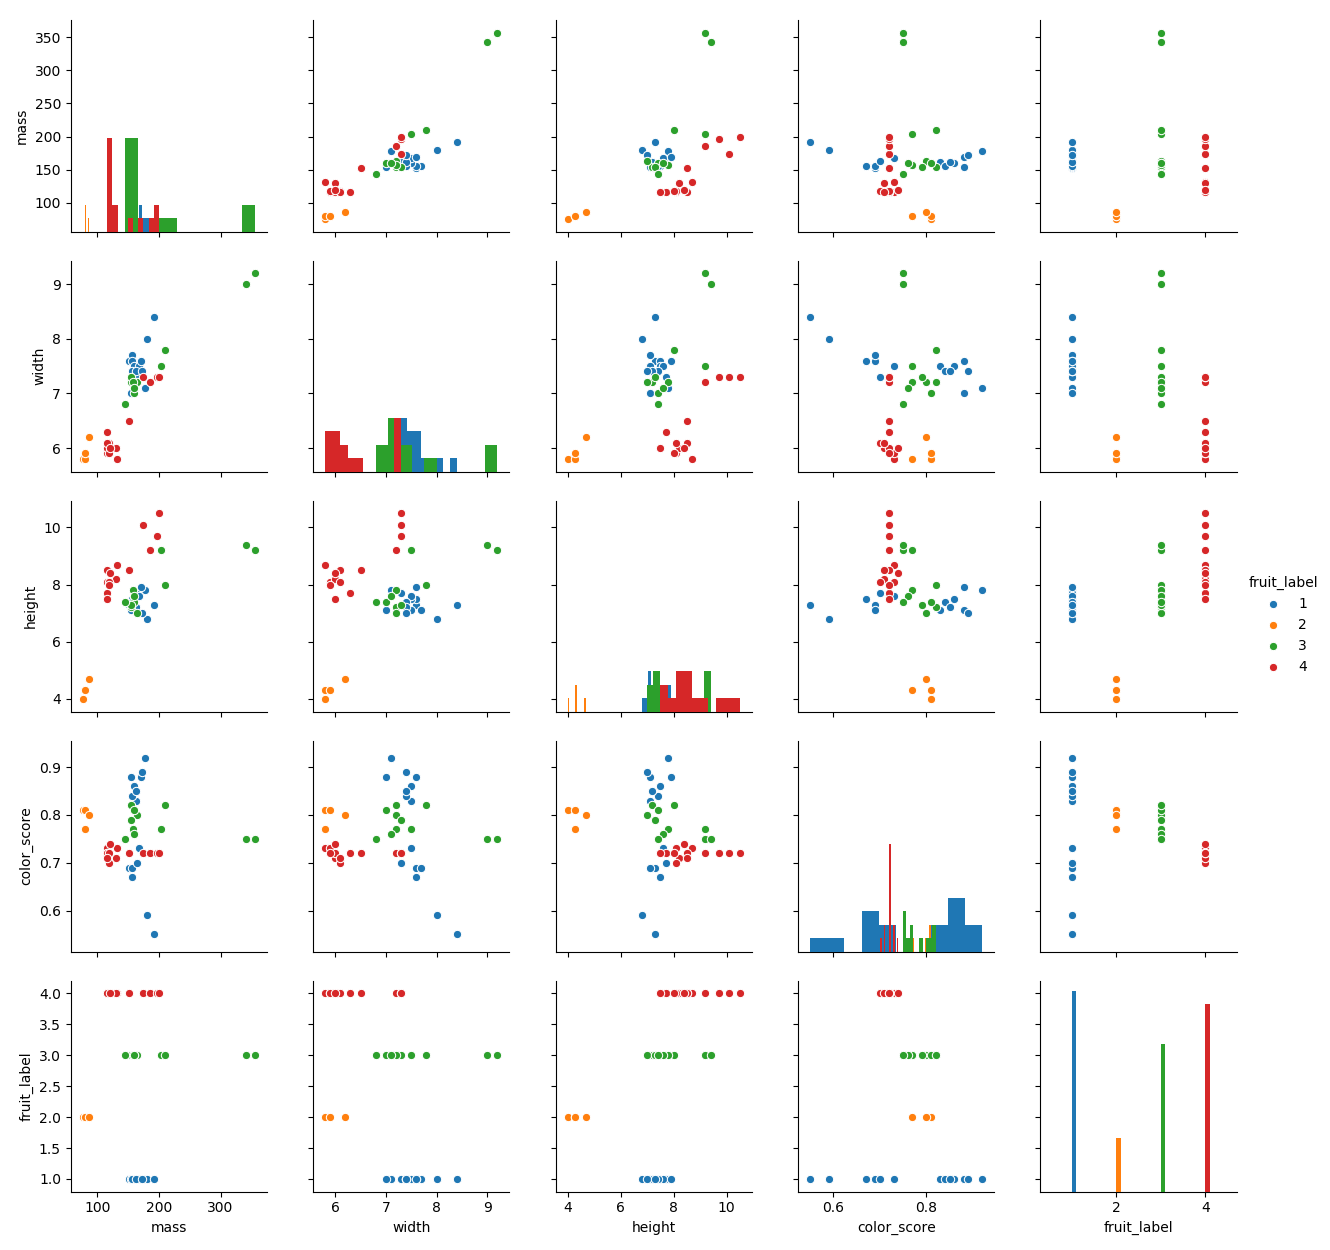

In [7]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
sns.pairplot(X_train.join(y_train), hue='fruit_label',diag_kind='hist')


<IPython.core.display.Javascript object>


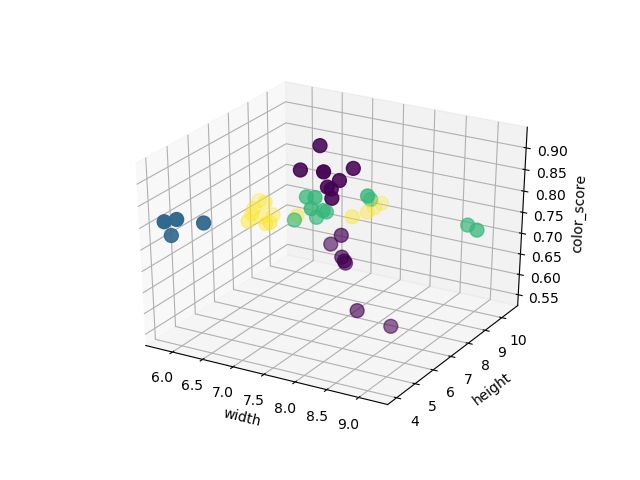

In [8]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## Train the Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Estimate the accuracy of the classifier 

In [12]:
knn.score(X_test,y_test)

0.5333333333333333

In [18]:
fruit_prediction = knn.predict([[20,4.3,5.5,0.7628]])
fruits_lookup[fruit_prediction[0]]

'mandarin'

../resources\adspy_shared_utilities.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
../resources\adspy_shared_utilities.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


<IPython.core.display.Javascript object>


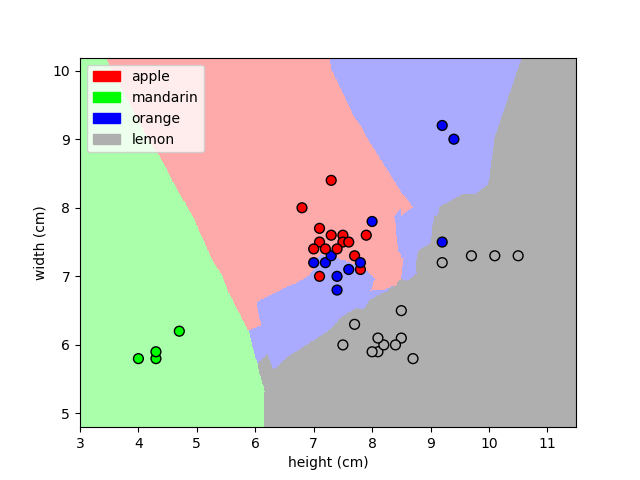

In [22]:
import sys  
sys.path.insert(0, '../resources/')
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train,y_train,5,'uniform')

## Let's try to improve accuracy

<IPython.core.display.Javascript object>


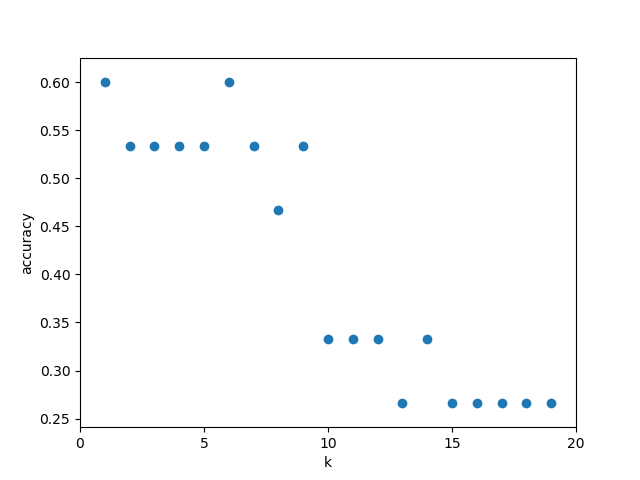

([<matplotlib.axis.XTick at 0x272aa590>,
 <a list of 5 Text xticklabel objects>)

In [24]:
k_range = range(1,20)
scores = []

for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        scores.append(knn.score(X_test,y_test))
        
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])